# Surface Waves Analysis - Notebook 1
This routine aims to process a shot gather with MASW approach to extract the dispersion curve

**Author:** Alberto Carrera

## 1. Import Libraries and Load Data

Load data from SEG2, SEGY, or DAT files using SWAutils.

Extract:
- Seismic data array (`nsamples × ntraces`)
- Sampling interval (`SR`)
- Receiver positions (`x`)

In [1]:
import matplotlib.pyplot as plt
import SWAutils as swa
import numpy as np

filename = "Shot1.dat"
#filename = input("Enter the filename {}:")
datadir = "../data/"  # Folder path for data
figdir = '../figures/'

# Load seismic stream
data, SR, x = swa.load_stream(filename, datadir)

#print(f"Receiver positions (m): {x}")
print(f"Shot gather dimensions: {data.shape}")
print(f"Sampling rate: {SR} s")

▶ Receiver positions extracted from SEG2 header.
Shot gather dimensions: (4000, 24)
Sampling rate: 0.00025 s


/home/alberto/anaconda3/envs/swa/lib/python3.9/site-packages/obspy/io/seg2/seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


## 2. Data Visualization

### 2a. Wiggle Plot
Plot normalized traces with offsets and filled positive/negative amplitudes.

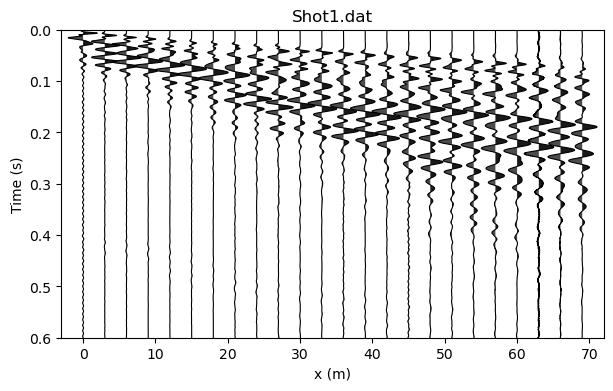

In [2]:
fig, ax = plt.subplots(figsize=(7, 4))
swa.wiggle(swa.normit(data), SR=SR, xx=x, ax=ax)
ax.set_title(filename)
ax.set_ylim(0.6, 0)
plt.show()

#data = np.fliplr(data)

### 2b. Spectral Density
Compute and plot cumulative spectral density for overview of frequency content.

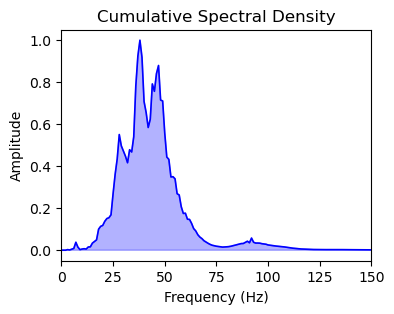

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))
swa.cumul_spectra(data, SR, ax=ax)
ax.set_xlim(0, 150)
plt.show()

## 3. f-k Transformation

Compute the 2D frequency-wavenumber (f-k) spectrum.  
Store absolute and normalized amplitudes for further analysis.

In [4]:
ks, ks_w, freqs, TRRabs, TRRnorm = swa.compute_fk(data, SR, x)

Computing f-k transform: 100%|███████████████| 100/100 [00:00<00:00, 163.35it/s]


### 3a. Plot f-k Spectrum
Visualize normalized f-k spectrum to inspect energy distribution.

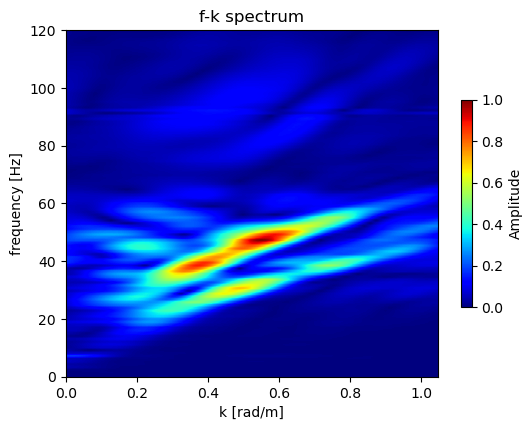

In [5]:
fig, ax = plt.subplots(figsize=(6, 4.5))
swa.plot_fk(TRRnorm, ks_w, freqs, ax=ax)
ax.set_ylim(0, 120)
plt.show()
#fig.savefig(figdir+filename[:-4]+"_fk.png", dpi=150)

### 3b. Interactive Picking of Maximum Amplitudes
Pick the dispersion curve points directly from the f-k spectrum.

In [6]:
import matplotlib
matplotlib.use('TkAgg')

fig, ax = plt.subplots(figsize=(10,6))
c_max, ax, ks_sampl, freq_sampl, c = swa.pick_amplitudes(TRRnorm, ks_w, freqs, filename, ax=ax, ylim=(0, 150))
plt.show()

Click on maxima and press ENTER when done:
Selected points: [(0.23477493486504364, 21.42857142857143), (0.47123889803846886, 29.545454545454547), (0.6536539553436826, 36.36363636363637), (0.9728803056278068, 45.129870129870135)]


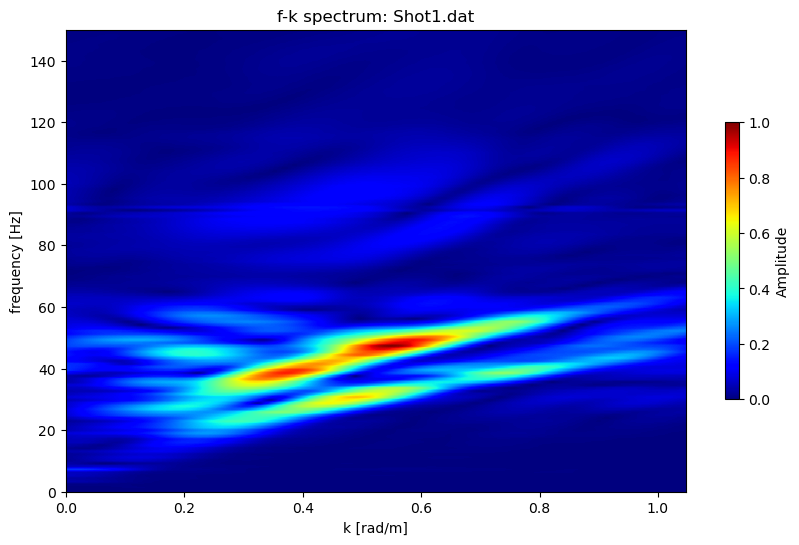

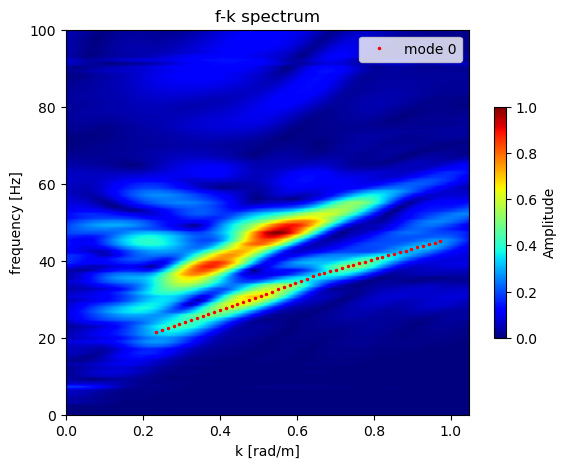

In [7]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6.5, 5))
swa.plot_fk(TRRnorm, ks_w, freqs, ax=ax)
ax.plot(ks_sampl, freq_sampl, "r.", label='mode 0', markersize=3)
ax.set_ylim(0, 100)
ax.legend()
plt.show()

## 4. Extract and Save Dispersion Curve

Generate dispersion curve from picked points.  
Save both figure and data table for further analysis.

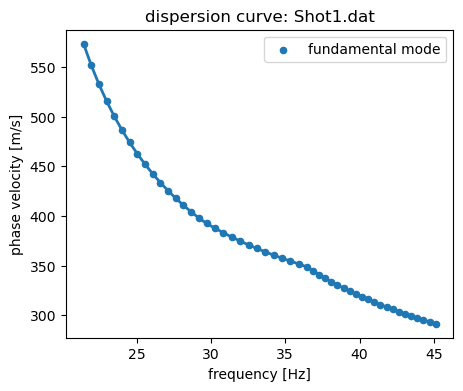

📁 Dispersion curve will be saved in: ../data/disp_curves/Shot1


,freq(Hz),V_ph(m/s)
0,21.428571,573.484070
1,21.945638,551.911000
2,22.462705,532.791393
3,22.979772,515.729227
4,23.496838,500.409360


In [8]:
df, fig, ax = swa.extract_dc(freq_sampl, c, filename, datadir="../data/")
df.head()